In [110]:
import numpy as np
from scipy import optimize
from sim.cartpole import CartPoleEnv
from agents.sin_agent import SinAgent
import csv
from pyswarms.single.global_best import GlobalBestPSO
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import tikzplotlib
from util.io import read_data

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


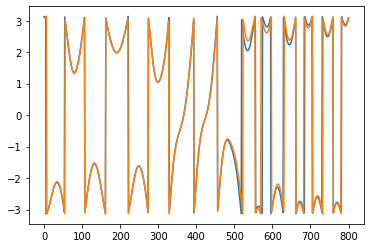

In [136]:
solution_theta = [1.0, 0.1, 0.5]
solution_states = fun(solution_theta)
states = fun(solution_theta)
plt.figure()
plt.plot(states[:,3])
plt.plot(solution_states[:,3])


In [8]:
def loss_(theta):
    states = fun(theta)
    delta_phi = (solution_states[:,[3]] - states[:,[3]]) % (2 * np.pi)
    delta_phi = np.minimum(delta_phi, 2*np.pi - delta_phi)**2
    return (solution_states[:,[0]] - states[:,[0]])**2 + delta_phi

def loss(theta):
    if isinstance(theta[0], float):
        return np.sum(loss_(theta))
    else:
        losses = []
        for t in theta:
            losses += [np.sum(loss(t))]
        return losses

In [9]:
solution_states, actions = read_data('pendel.csv')
solution_states = np.array(solution_states)
actions = np.array(actions)
print(solution_states.shape, actions.shape)

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(759, 4) (759,)


In [137]:
def fun2(theta, render=False):
    env = CartPoleEnv(swingup=True, solver='rk')
    env.mu_pole = theta[0]
    #env.masscart = 10.0
    env.mu_cart = 0.3
    env.length = theta[1]
    env.masspole = theta[2]
    env.reset()
    env.state = solution_states[0]
    env.state[2] = np.pi/180
    env.state[3] = 0.2
        
    states = []
    if render:
        env.render()
    for i in range(len(actions)):
        states += [env.step([0])[0]]
        if render:
            env.render()
    env.close()
    return np.array(states)

In [138]:
def loss2_(theta):
    states = fun2(theta)
    delta_phi = (solution_states[:,2] - states[:,2]) % (2 * np.pi)
    delta_phi = np.minimum(delta_phi, 2*np.pi - delta_phi)**2
    return  delta_phi #+ (solution_states[:,0] - states[:,0])**2

def loss2(theta):
    losses = []
    for t in theta:
        losses += [np.sum(loss2_(t))]
    return losses


In [140]:
bounds = ([0.00001, 0.13, 0.035], 
          [0.1, 0.16, 0.06])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=20, dimensions=3, options=options, bounds=bounds)
cost, pos = optimizer.optimize(loss2, 100)

2020-04-02 18:16:27,144 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=37.8
2020-04-02 18:20:53,294 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 37.801465400795614, best pos: [0.00041765 0.13900752 0.04113565]


/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


37.801465400795614


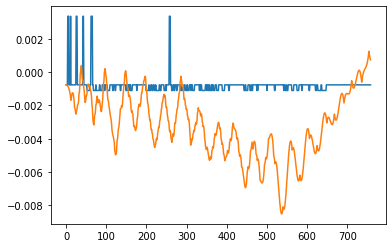

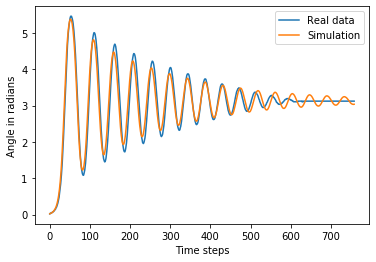

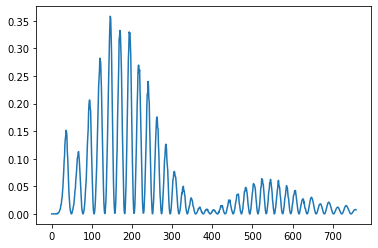

In [141]:
pos2 = [0.0003, 0.13, 0.05]
states = fun2(pos)
plt.figure()
plt.plot(solution_states[:,0])
plt.plot(states[:,0])
plt.figure()
a, = plt.plot(np.where(solution_states[:,2] < 0, solution_states[:,2] + 2*np.pi, solution_states[:,2]), label='Real data')
b, = plt.plot(np.where(states[:,2] < 0, states[:,2] + 2*np.pi, states[:,2]), label='Simulation')
plt.xlabel('Time steps')
plt.ylabel('Angle in radians')
plt.legend(handles=[a,b])
tikzplotlib.save("polefit.tex")
plt.figure()
plt.plot(loss2_(pos))
print(np.sum(loss2_(pos)))

In [128]:
optimize.least_squares(loss2_, pos2, bounds=bounds)

 active_mask: array([0, 0, 0])
        cost: 10.901259661076011
         fun: array([1.72979701e-05, 7.80098868e-05, 1.57057289e-05, 2.04647168e-06,
       9.95155579e-05, 9.80350566e-06, 2.18488070e-05, 1.46510066e-05,
       4.20153402e-05, 8.84259337e-07, 2.17131680e-04, 1.76498083e-04,
       2.07902879e-04, 2.61154818e-04, 1.51030861e-03, 9.41807773e-04,
       1.99000591e-03, 4.08065406e-03, 5.16444673e-03, 7.56016245e-03,
       1.21425844e-02, 1.51966762e-02, 2.15913427e-02, 3.33372914e-02,
       3.80312441e-02, 5.75444898e-02, 7.09265144e-02, 9.65129717e-02,
       1.27889459e-01, 1.66013000e-01, 2.12478315e-01, 2.68013944e-01,
       3.12660084e-01, 3.81105957e-01, 4.28658492e-01, 4.64110518e-01,
       4.98553318e-01, 4.98348433e-01, 4.81246169e-01, 4.17389515e-01,
       3.78625546e-01, 3.16967532e-01, 2.54431709e-01, 1.93537034e-01,
       1.49789803e-01, 1.08834720e-01, 7.25376941e-02, 5.00394684e-02,
       3.11217004e-02, 1.64411693e-02, 6.35089110e-03, 1.08072554e-03,